In [1]:
import sys
sys.path.append("..")
from MPRA_predict.utils import *

In [2]:
MPRA_df = pd.read_csv('../data/Gosai_MPRA/Gosai_MPRA_Sei_feature_0529_norm.csv')
MPRA_df

,seq,ID,chr,pos,ref_allele,alt_allele,allele,OL,data_project,K562,HepG2,SK-N-SH,A549,HCT116,K562_DNase,K562_H3K4me3,K562_H3K27ac,K562_H3K27me3,K562_H3K4me1,K562_H3K36me3,K562_H3K9me3,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27ac,HepG2_H3K27me3,HepG2_H3K4me1,HepG2_H3K36me3,HepG2_H3K9me3,HepG2_CTCF,SK-N-SH_DNase,SK-N-SH_H3K4me3,SK-N-SH_H3K27ac,SK-N-SH_H3K27me3,SK-N-SH_H3K4me1,SK-N-SH_H3K36me3,SK-N-SH_H3K9me3,SK-N-SH_CTCF,HCT116_DNase,HCT116_H3K4me3,HCT116_H3K27ac,HCT116_H3K27me3,HCT116_H3K4me1,HCT116_H3K36me3,HCT116_H3K9me3,HCT116_CTCF,A549_DNase,A549_H3K4me3,A549_H3K27ac,A549_H3K27me3,A549_H3K4me1,A549_H3K36me3,A549_H3K9me3,A549_CTCF
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:A:wC,chr1,14677,G,A,alt,OL41_42,GTEx,0.014,-0.054,0.012,NaN,-0.719,1.390,2.062,1.980,1.975,1.896,1.928,1.882,1.568,1.227,1.828,1.575,2.338,1.326,2.126,NaN,1.335,1.136,1.808,1.173,2.097,NaN,1.748,NaN,1.230,0.887,1.954,1.554,1.663,1.130,2.058,NaN,1.344,1.077,2.016,1.678,NaN,1.378,NaN,2.238,1.398
1,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:R:wC,chr1,14677,G,A,ref,OL41_42,GTEx,-1.042,0.183,0.094,NaN,-0.250,1.411,2.094,1.990,2.005,1.902,1.947,1.916,1.545,1.233,1.853,1.580,2.326,1.287,2.111,NaN,1.302,1.203,1.905,1.257,2.096,NaN,1.731,NaN,1.225,0.892,1.990,1.585,1.758,1.171,2.085,NaN,1.316,1.081,2.076,1.723,NaN,1.399,NaN,2.277,1.375
2,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:A:wC,chr1,63697,T,C,alt,OL41_42,GTEx,-1.004,0.640,-0.188,NaN,0.685,0.425,0.468,0.103,0.818,0.243,0.401,-0.257,0.243,1.233,1.237,1.110,0.390,1.633,-0.085,NaN,0.645,-0.110,1.016,1.521,0.093,NaN,0.667,NaN,0.481,1.145,0.696,0.963,0.973,1.262,0.080,NaN,0.440,1.584,1.169,0.821,NaN,1.323,NaN,-0.209,0.514
3,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:R:wC,chr1,63697,T,C,ref,OL41_42,GTEx,-0.779,0.751,0.274,NaN,0.737,0.535,0.650,0.311,1.004,0.355,0.423,-0.260,0.293,1.239,1.420,1.261,0.485,1.719,-0.043,NaN,0.644,0.063,1.342,1.911,0.083,NaN,0.660,NaN,0.581,1.136,0.829,1.091,1.118,1.327,-0.002,NaN,0.463,1.607,1.408,1.054,NaN,1.488,NaN,-0.181,0.539
4,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,1:64764:C:T:R:wC,chr1,64764,C,T,ref,OL41_42,GTEx,-0.457,-0.645,0.061,NaN,-0.147,-0.905,-0.808,-0.649,-0.051,-0.960,-1.142,-1.254,-0.986,-0.986,-0.688,-0.744,-0.454,-0.600,-1.121,NaN,-1.136,-1.086,-0.706,-0.376,-0.965,NaN,-1.311,NaN,-1.033,-0.986,-0.944,-0.738,-0.269,-0.997,-1.182,NaN,-0.956,-1.133,-0.800,-0.735,NaN,-0.756,NaN,-1.374,-1.089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760674,CTGCATCTGTGCAGCCTGGCAGCGGCGGCGCTGCGCTGTGACATTT...,Y:15815629:NA:NA,chrY,15815629,NaN,NaN,NaN,OL15,OL15,0.708,1.294,1.077,NaN,NaN,2.340,2.772,2.077,2.699,2.173,2.724,2.559,1.704,2.190,2.655,1.838,2.159,1.572,2.181,NaN,1.503,3.214,3.521,2.520,2.442,NaN,1.579,NaN,2.171,2.152,3.157,2.291,3.047,1.898,2.714,NaN,1.411,2.389,3.121,2.806,NaN,2.094,NaN,2.726,1.675
760675,GCACTTCACATTTGTTTTTAGGGTTACATAGTCTACTCTGTATCCT...,Y:21740684:NA:NA,chrY,21740684,NaN,NaN,NaN,OL15,OL15,-0.708,-0.547,-0.429,NaN,NaN,-0.442,-0.692,-0.653,-0.289,-0.518,-0.454,-0.900,-0.701,-0.476,-0.811,-0.623,-0.503,-0.229,-0.569,NaN,-0.662,0.435,-0.592,-0.613,-0.740,NaN,-0.422,NaN,-0.401,-0.583,-0.885,-0.778,-0.403,-0.969,-0.667,NaN,-0.700,-0.395,-0.853,-0.732,NaN,-0.705,NaN,-0.555,-0.637
760676,TGTTCAAGTGGCCACAGGGTTACTTGCTTTAGCATGGCTCCTTGGC...,Y:21740884:NA:NA,chrY,21740884,NaN,NaN,NaN,OL15,OL15,-0.146,-0.200,-0.310,NaN,NaN,0.026,-0.156,0.190,0.085,0.238,0.346,-0.599,-0.131,0.557,0.220,0.750,-0.166,1.155,-0.130,NaN,0.258,0.585,0.190,1.309,-0.005,NaN,0.694,NaN,0.312,0.870,0.181,0.972,-0.029,1.078,-0.083,NaN,0.099,1.263,0.912,1.407,NaN,1.855,NaN,0.355,0.310
760677,TAATTAGTTGGGAAGGTTCAGGTTCTGGGACATCCGTTGCTATTTC...,Y:21741084:NA:NA,chrY,21741084,NaN,NaN,NaN,OL15,OL15,-0.119,-0.090,-0.387,NaN,NaN,0.131,-0.177,-0.151,

In [10]:
cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'H3K27me3', 'H3K4me1', 'H3K36me3', 'H3K9me3', 'CTCF']
# assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']

In [11]:
# 初始化空 DataFrame，行是 assay，列是 cell types + 'All'
corr_df = pd.DataFrame()

for assay in assays:
    pred_list = []
    true_list = []

    for cell_type in cell_types:
        pred = MPRA_df[f'{cell_type}_{assay}']
        true = MPRA_df[cell_type]

        r, _ = pearson(pred, true)
        corr_df.loc[cell_type, assay] = r

        pred_list.append(pred)
        true_list.append(true)

    # 合并后的相关性
    pred_all = np.concatenate(pred_list)
    true_all = np.concatenate(true_list)
    r, _ = pearson(pred_all, true_all)
    corr_df.loc['All', assay] = r

corr_df

after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan


,DNase,H3K4me3,H3K27ac,H3K27me3,H3K4me1,H3K36me3,H3K9me3,CTCF
K562,0.535,0.483,0.487,0.195,0.406,0.361,0.335,0.400
HepG2,0.483,0.502,0.454,0.218,0.336,0.359,NaN,0.384
SK-N-SH,0.420,0.495,0.490,0.267,NaN,0.252,NaN,0.355
HCT116,0.483,0.500,0.500,0.336,0.483,0.334,NaN,0.376
A549,0.347,0.363,0.361,NaN,0.298,NaN,0.215,0.251
All,0.469,0.483,0.471,0.247,0.387,0.326,0.304,0.368


In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

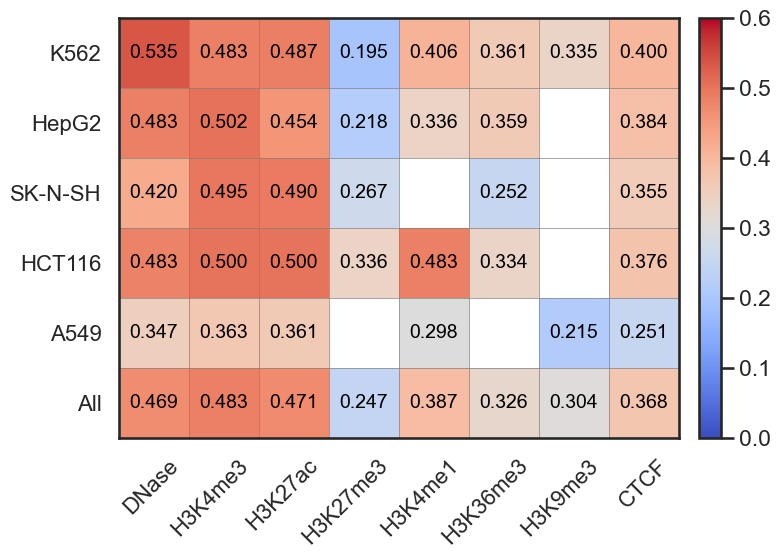

In [36]:
sns.set_style("white")

# 提取数据
data = corr_df.values
row_labels = corr_df.index.tolist()
col_labels = corr_df.columns.tolist()

# 创建画布和坐标轴
fig, ax = plt.subplots(figsize=(9, 6), dpi=100)
plt.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9)

# 绘制热图
im = ax.imshow(data, cmap='coolwarm', vmin=0, vmax=0.6)

# 设置 divider 来控制 colorbar 的轴
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.2)  # size 为 colorbar 宽度，pad 为间距

# 添加 colorbar
cbar = fig.colorbar(im, cax=cax)

# 添加文本注释（跳过 NaN）
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        val = data[i, j]
        if not np.isnan(val):
            ax.text(j, i, f'{val:.3f}', ha='center', va='center', color='black', fontsize=14)

# 设置坐标轴标签
ax.set_xticks(np.arange(len(col_labels))+0.4)
ax.set_yticks(np.arange(len(row_labels)))
ax.set_xticklabels(col_labels, rotation=45, ha='right', fontsize=16)
ax.set_yticklabels(row_labels, fontsize=16)

# 设置灰色网格线
ax.set_xticks(np.arange(data.shape[1]+1)-0.5, minor=True)
ax.set_yticks(np.arange(data.shape[0]+1)-0.5, minor=True)
ax.grid(which='minor', color='gray', linewidth=0.5)
ax.tick_params(which='minor', bottom=False, left=False)

# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

# # 自动布局和保存
# plt.tight_layout()
plt.savefig('figures/Gosai_MPRA_correlation_VEFs_activity_heatmap.png', dpi=400)

0.3050754312887567 0.2255531472863943


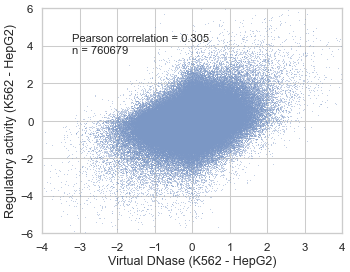

In [72]:
sns.set_theme(context='talk', style='whitegrid')
plt.figure(figsize=(8, 6), dpi=50)
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.9, top=0.9)

x = MPRA_df[f'K562_DNase'] - MPRA_df[f'HepG2_DNase']
y = MPRA_df[f'K562'] - MPRA_df[f'HepG2']
r = pearson(x, y)[0]
r2 = spearman(x, y)[0]
print(r, r2)

g = sns.scatterplot(x=x, y=y, s=1)
plt.text(
    x=0.1, y=0.8, transform=g.transAxes, fontsize=16,
    s=f'Pearson correlation = {r:.3f} \nn = {len(x)}', 
)

plt.xlim(-4, 4)
plt.ylim(-6, 6)
plt.xlabel(f'Virtual {assay} (K562 - HepG2)')
plt.ylabel(f'Regulatory activity (K562 - HepG2)')
plt.savefig(f'figures/Gosai_MPRA_Sei_{assay}_K562-HepG2.png', dpi=400)
plt.show()

0.5273795592950066 0.4876885907208658


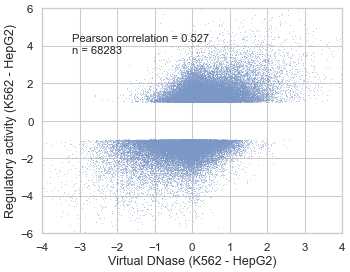

In [73]:
sns.set_theme(context='talk', style='whitegrid')
plt.figure(figsize=(8, 6), dpi=50)
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.9, top=0.9)

x = MPRA_df[f'K562_DNase'] - MPRA_df[f'HepG2_DNase']
y = MPRA_df[f'K562'] - MPRA_df[f'HepG2']

cond = (y.abs() > 1)
x = x[cond]
y = y[cond]

r = pearson(x, y)[0]
r2 = spearman(x, y)[0]
print(r, r2)

g = sns.scatterplot(x=x, y=y, s=1)
plt.text(
    x=0.1, y=0.8, transform=g.transAxes, fontsize=16,
    s=f'Pearson correlation = {r:.3f} \nn = {len(x)}', 
)

plt.xlim(-4, 4)
plt.ylim(-6, 6)
plt.xlabel(f'Virtual {assay} (K562 - HepG2)')
plt.ylabel(f'Regulatory activity (K562 - HepG2)')
plt.savefig(f'figures/Gosai_MPRA_Sei_{assay}_K562-HepG2_diff.png', dpi=400)
plt.show()

In [37]:
# 不标准化，合并不同细胞类型，相关性

for j, assay in enumerate(assays):
    pred_list = []
    true_list = []
    for i, cell_type in enumerate(cell_types):
        pred = MPRA_df[f'{cell_type}_{assay}']
        true = MPRA_df[cell_type]
        pred_list.append(pred)
        true_list.append(true)
    
    pred_list = np.concatenate(pred_list)
    true_list = np.concatenate(true_list)

    r, _ = pearson(pred_list, true_list)
    print(assay, r)

DNase 0.46668278948444275
H3K4me3 0.4799839543623713
H3K27ac 0.46959975942969495
CTCF 0.3778155591560792


In [38]:
# 标准化，合并不同细胞类型，相关性

for j, assay in enumerate(assays):
    pred_list = []
    true_list = []
    for i, cell_type in enumerate(cell_types):
        pred = MPRA_df[f'{cell_type}_{assay}']
        true = MPRA_df[cell_type]
        mean = pred.mean()
        std  = pred.std()
        pred = (pred - mean) / std

        pred_list.append(pred)
        true_list.append(true)
    
    pred_list = np.concatenate(pred_list)
    true_list = np.concatenate(true_list)

    r, _ = pearson(pred_list, true_list)
    print(assay, r)

DNase 0.47942067151309437
H3K4me3 0.49323408783421574
H3K27ac 0.4767878468762306
CTCF 0.3796738394846004


In [2]:
MPRA_df = pd.read_csv('../data/Gosai_MPRA/Gosai_MPRA_Sei_feature_0529_norm.csv')

In [3]:
cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF', 'H3K27me3', 'H3K4me1', 'H3K36me3', 'H3K9me3']

In [7]:
print(MPRA_df[cell_types].mean(0))
print(MPRA_df[cell_types].std(0))

for cell_type in cell_types:
    for assay in assays:
        print(cell_type, assay, MPRA_df[f'{cell_type}_{assay}'].mean(), MPRA_df[f'{cell_type}_{assay}'].std())

K562      -0.004
HepG2     -0.006
SK-N-SH   -0.005
HCT116    -0.005
A549      -0.005
dtype: float64
K562      0.994
HepG2     0.994
SK-N-SH   0.993
HCT116    0.995
A549      0.995
dtype: float64
K562 DNase -0.007303641178688146 0.9956162234678286
K562 H3K4me3 -0.009868688428775519 0.9954189703847107
K562 H3K27ac -0.007376684654252581 0.9959177239144326
K562 CTCF -0.008608697812701531 0.995899558131386
K562 H3K27me3 -0.00610569625596124 0.9956668535390887
K562 H3K4me1 -0.007806910357054912 0.9970983489189335
K562 H3K36me3 -0.008452588929461562 0.9973699682389655
K562 H3K9me3 -0.01732692058982279 0.992023583720387
HepG2 DNase -0.00942622556824938 0.9949051168284015
HepG2 H3K4me3 -0.010408285160435434 0.9951596688015472
HepG2 H3K27ac -0.008518519237463051 0.9964424872758277
HepG2 CTCF -0.008245252662227585 0.9971335221738205
HepG2 H3K27me3 -0.010336083209473886 0.9943508736494808
HepG2 H3K4me1 -0.005224499887765164 0.9974909365431504
HepG2 H3K36me3 -0.009693521265611862 0.99550786619816
H

In [30]:
cell_types = ['K562', 'HepG2', 'SK-N-SH']
assays = ['DNase', 'CTCF', 'H3K4me3', 'H3K27ac']

In [6]:
######## plot

corr_df = pd.DataFrame(index=cell_types, columns=assays, dtype=float)

for i, cell_type in enumerate(cell_types):
    for j, assay in enumerate(assays):
        pred = MPRA_df[f'{cell_type}_{assay}']
        true = MPRA_df[cell_type]
        r, _ = pearson(pred, true)
        corr_df.loc[cell_type, assay] = r

corr_df

after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan


,DNase,H3K4me3,H3K27ac,CTCF,H3K27me3,H3K4me1,H3K36me3,H3K9me3
K562,0.535,0.483,0.487,0.400,0.195,0.406,0.361,0.335
HepG2,0.483,0.502,0.454,0.384,0.218,0.336,0.359,NaN
SK-N-SH,0.420,0.495,0.490,0.355,0.267,NaN,0.252,NaN
HCT116,0.483,0.500,0.500,0.376,0.336,0.483,0.334,NaN
A549,0.347,0.363,0.361,0.251,NaN,0.298,NaN,0.215


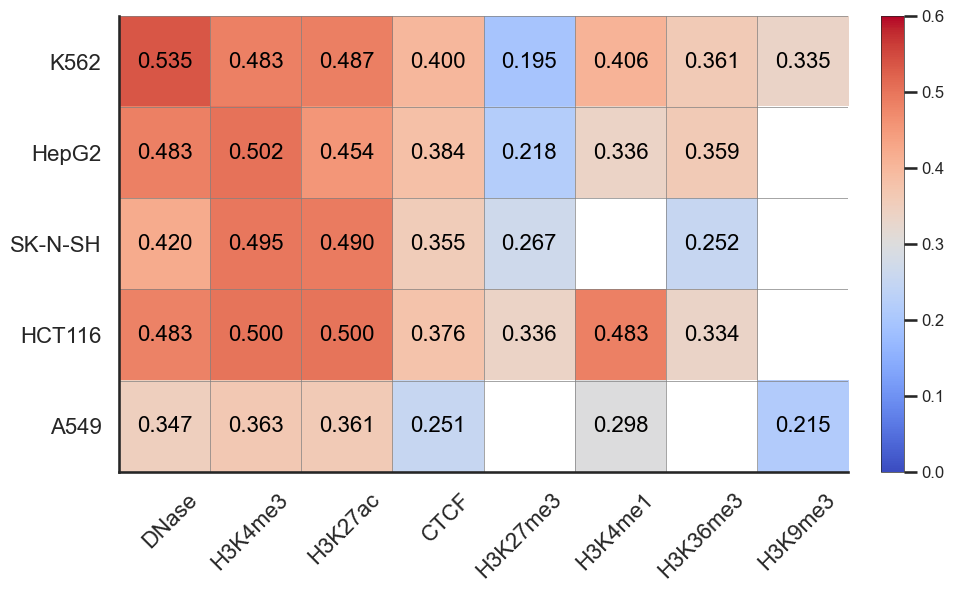

In [24]:
import matplotlib.pyplot as plt
import numpy as np
sns.set_style("white")

# 提取数据
data = corr_df.values
row_labels = corr_df.index.tolist()
col_labels = corr_df.columns.tolist()

# 创建画布和坐标轴
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)

# 绘制热图
im = ax.imshow(data, cmap='coolwarm', vmin=0, vmax=0.6)

# 添加 colorbar
cbar = fig.colorbar(im, ax=ax, fraction=0.04, pad=0.04)
cbar.ax.tick_params(labelsize=12)
cbar.outline.set_linewidth(0.5)

# 添加文本注释（跳过 NaN）
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        val = data[i, j]
        if not np.isnan(val):
            ax.text(j, i, f'{val:.3f}', ha='center', va='center', color='black', fontsize=16)

# 设置坐标轴标签
ax.set_xticks(np.arange(len(col_labels))+0.4)
ax.set_yticks(np.arange(len(row_labels)))
ax.set_xticklabels(col_labels, rotation=45, ha='right', fontsize=16)
ax.set_yticklabels(row_labels, fontsize=16)

# 设置灰色网格线
ax.set_xticks(np.arange(data.shape[1]+1)-0.5, minor=True)
ax.set_yticks(np.arange(data.shape[0]+1)-0.5, minor=True)
ax.grid(which='minor', color='gray', linewidth=0.5)
ax.tick_params(which='minor', bottom=False, left=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 自动布局和保存
plt.tight_layout()
plt.savefig('figures/Gosai_MPRA_correlation_VEFs_regulatory_activity_heatmap.png', dpi=400)

In [ ]:
x = MPRA_df['K562']
y = MPRA_df['K562_DNase']
sns.scatterplot(x=x, y=y, s=1)

In [44]:
data_split_dict = {}
data_split_dict['total'] = np.ones(len(MPRA_df), dtype=bool)
data_split_dict['chrom'] = MPRA_df['chr'].isin([f'chr{i}' for i in (list(range(1, 23)) + ['X', 'Y'])])
data_split_dict['designed'] = ~data_split_dict['chrom']

data_split_dict['train'] = MPRA_df['chr'].isin([f'chr{i}' for i in (list(range(3, 23)) + ['X', 'Y'])])
data_split_dict['valid'] = MPRA_df['chr'].isin(['chr1'])
data_split_dict['test'] = MPRA_df['chr'].isin(['chr2'])

In [75]:
# 真实活性和DNase的相关性
# cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']
# assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']

for assay in assays:
    # cell_types_assay = [f'{cell_type}_{assay}' for cell_type in cell_types]
    corr_df = pd.DataFrame(dtype=float)
    for cell_type in cell_types:
        for cell_type_2 in cell_types:
            df = MPRA_df
            x = df[f'{cell_type}']
            y = df[f'{cell_type_2}_{assay}']
            r, p = pearson(x, y)
            corr_df.loc[f'{cell_type}', f'{cell_type_2}_{assay}'] = r
    print(assay)
    print(corr_df)

DNase
         K562_DNase  HepG2_DNase  SK-N-SH_DNase
K562          0.535        0.400          0.410
HepG2         0.522        0.483          0.451
SK-N-SH       0.469        0.384          0.420
H3K4me3
         K562_H3K4me3  HepG2_H3K4me3  SK-N-SH_H3K4me3
K562            0.483          0.412            0.442
HepG2           0.501          0.502            0.488
SK-N-SH         0.458          0.430            0.495
H3K27ac
         K562_H3K27ac  HepG2_H3K27ac  SK-N-SH_H3K27ac
K562            0.487          0.345            0.400
HepG2           0.506          0.454            0.458
SK-N-SH         0.454          0.352            0.490
CTCF
         K562_CTCF  HepG2_CTCF  SK-N-SH_CTCF
K562         0.400       0.338         0.374
HepG2        0.416       0.384         0.407
SK-N-SH      0.350       0.299         0.355


In [28]:
corr_df = pd.DataFrame(index=cell_types, columns=assays, dtype=float)

for i, cell_type in enumerate(cell_types):
    for j, assay in enumerate(assays):
        pred = MPRA_df[f'{cell_type}_{assay}']
        true = MPRA_df[cell_type]
        r, _ = pearson(pred, true)
        corr_df.loc[cell_type, assay] = r

corr_df

,DNase,H3K4me3,H3K27ac,CTCF
K562,0.600,0.531,0.521,0.406
HepG2,0.528,0.530,0.487,0.381
SK-N-SH,0.462,0.523,0.499,0.362
HCT116,0.543,0.536,0.535,0.376
A549,0.438,0.397,0.414,0.273


In [29]:
# 真实活性和DNase的相关性
cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']

for assay in assays:
    cell_types_assay = [f'{cell_type}_{assay}' for cell_type in cell_types]
    corr_df = pd.DataFrame(index=cell_types, columns=cell_types_assay, dtype=float)
    for cell_type in cell_types:
        for cell_type_assay in cell_types_assay:
            df = MPRA_df
            x, y = df[f'{cell_type}'], df[f'{cell_type_assay}']
            r, p = pearson(x, y)
            corr_df.loc[cell_type, cell_type_assay] = r
    print(assay)
    print(corr_df)

DNase
         K562_DNase  HepG2_DNase  SK-N-SH_DNase  HCT116_DNase  A549_DNase
K562          0.600        0.446          0.453         0.492       0.487
HepG2         0.567        0.528          0.481         0.519       0.529
SK-N-SH       0.526        0.434          0.462         0.471       0.480
HCT116        0.556        0.488          0.483         0.543       0.524
A549          0.432        0.363          0.337         0.433       0.438
H3K4me3
         K562_H3K4me3  HepG2_H3K4me3  SK-N-SH_H3K4me3  HCT116_H3K4me3  A549_H3K4me3
K562            0.531          0.447            0.471           0.486         0.464
HepG2           0.538          0.530            0.507           0.537         0.519
SK-N-SH         0.510          0.469            0.523           0.515         0.491
HCT116          0.512          0.485            0.500           0.536         0.507
A549            0.380          0.356            0.380           0.405         0.397
H3K27ac
         K562_H3K27ac  HepG2_H